In [9]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm

In [10]:
N_steps = 100
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

In [14]:
result_loc = "./../../../Server_results/exp_2/"
train_loc = "Run_no_zero_flow_Run_1613752497/"

In [15]:
q_x = np.loadtxt(f"{result_loc}check_initial_18_04_21k_x.txt")
q_x = q_x.reshape([-1,N_k,N_steps])
q_y = np.loadtxt(f"{result_loc}check_initial_18_04_21k_x.txt")
q_y = q_y.reshape([-1,N_k,N_steps])
k_x = np.loadtxt(f"{result_loc}check_initial_18_04_21k_x.txt")
k_x = k_x.reshape([-1,N_k,N_steps])
k_y = np.loadtxt(f"{result_loc}check_initial_18_04_21k_x.txt")
k_y = k_y.reshape([-1,N_k,N_steps])
k_xy = np.loadtxt(f"{result_loc}check_initial_18_04_21k_x.txt")
k_xy = k_xy.reshape([-1,N_k,N_steps])
p = np.loadtxt(f"{result_loc}check_initial_18_04_21k_x.txt")
p = p.reshape([-1,N_k])

In [16]:
k_xy.shape

(1, 64, 100)

In [17]:
# df_k_imp = pd.read_csv(f"{result_loc}check_initialq_x.txt",sep='\t',header=None)

In [18]:
def plot_cdf(p,qoi,time_step,epoch):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(QOI[index],np.cumsum(P))


In [19]:
plot_cdf(p,q_x,70,17)

IndexError: index 17 is out of bounds for axis 0 with size 1

In [20]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_6.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_6.txt")


In [21]:
q_MC_x.shape

(100, 1800)

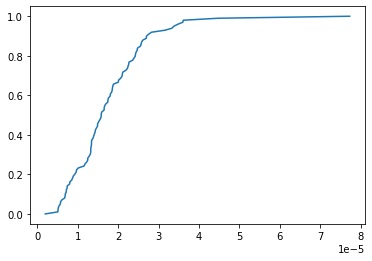

In [22]:
Q_MC = q_MC_x[:,1256]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

# Q_MC = q_MC_x[0,0]

# index_MC = np.argsort(Q_MC)
# plt.plot(Q_MC[index_MC],np.linspace(0,1,100))

In [23]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [24]:
Q_MC

array([1.57987429e-05, 3.61015518e-05, 1.54176773e-05, 7.39441357e-06,
       2.47578679e-05, 4.47494326e-05, 1.41054462e-05, 1.79990913e-05,
       1.83868727e-05, 9.63022024e-06, 1.96903189e-06, 5.73473858e-06,
       1.34036457e-05, 1.88409518e-05, 1.68998425e-05, 8.51975175e-06,
       2.75335896e-05, 2.47171923e-05, 1.48910592e-05, 1.28544459e-05,
       5.35834009e-06, 1.86721285e-05, 6.86945765e-06, 8.71587116e-06,
       2.10385479e-05, 9.30810723e-06, 2.19491272e-05, 1.39453437e-05,
       1.65101144e-05, 7.17065452e-06, 1.48931309e-05, 1.33983648e-05,
       1.74407143e-05, 2.69807744e-05, 1.15601300e-05, 1.85203461e-05,
       2.42220654e-05, 1.56850295e-05, 2.82505034e-05, 8.03117892e-06,
       2.35900105e-05, 1.58116478e-05, 6.91814727e-06, 2.57853684e-05,
       5.17830290e-06, 7.72657386e-05, 6.77603779e-06, 2.54878883e-05,
       1.17869763e-05, 5.70321549e-06, 1.24888853e-05, 2.06374842e-05,
       2.11304219e-05, 8.00050906e-06, 9.68711228e-06, 8.91704091e-06,
      

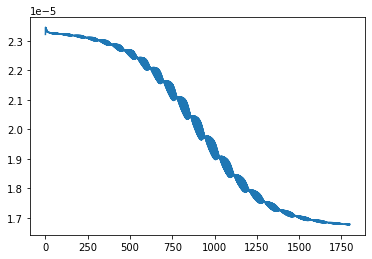

In [25]:
plt.plot(q_MC_x.mean(axis=0))

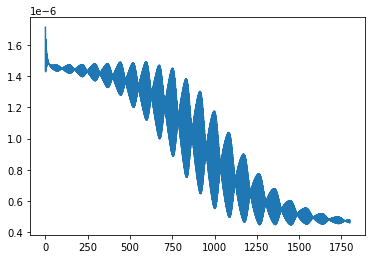

In [26]:
plt.plot(q_MC_y.mean(axis=0))

In [27]:
plt.plot(q_y[4,:,:].mean(axis=0))

IndexError: index 4 is out of bounds for axis 0 with size 1

In [28]:
plt.plot(q_x[4,:,:].mean(axis=0))

IndexError: index 4 is out of bounds for axis 0 with size 1

In [29]:
plt.plot(q_x[3,:,:].mean(axis=0))

IndexError: index 3 is out of bounds for axis 0 with size 1